# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle.


Description of the data: 'price', 'model_year', 'model', 'condition', 'cylinders', 'fuel' — gas, diesel, etc, 'odometer' — the vehicle's mileage when the ad was published, 'transmission', 'paint_color', 'is_4wd' — whether the vehicle has 4-wheel drive (Boolean type), 'date_posted' — the date the ad was published, 'days_listed' — from publication to removal

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import plotly.express as px

In [2]:
#read the data
vehicles_us = pd.read_csv('/Users/fanibhushan/Downloads/vehicles_us.csv')
vehicles_us.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
#row & column
vehicles_us.shape

(51525, 13)

In [4]:
#variable type
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vehicles_us.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


we can see that 'model_year','cylinder','odometer' &'is_4wd' has missing values. As 51525 seems to be the number of rows overall.

In [6]:
#missing value in column 'is_4wd'  & here true means has missing values
vehicles_us['is_4wd'].isna().value_counts()

True     25953
False    25572
Name: is_4wd, dtype: int64

In [7]:
#missing value in column 'odometer'
vehicles_us['odometer'].isna().value_counts()

False    43633
True      7892
Name: odometer, dtype: int64

In [8]:
vehicles_us.loc[vehicles_us['odometer'] == 0,'odometer'].value_counts()

0.0    185
Name: odometer, dtype: int64

In [9]:
vehicles_us.loc[vehicles_us['days_listed'] == 0,'days_listed'].value_counts()

0    54
Name: days_listed, dtype: int64

'is_4wd' has 25953 missing value & 'odometer' has 7892 missing value. 
185 rows has odometer value as 0 & 54 rows has days_listed value as 0.
'is_4wd' : As the boolean field contain only 1 value that is true then it's reasonable to assume that missing values are False that is missing values can be replaced by 0.


In [10]:
vehicles_us.describe(include=np.object)

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


shows there are 100 different types of model out of which top model was 'ford f-150'. 48% were in excellent condition. 91% fuel type was 'gas' & transmission type were automatic.

### Conclusion
The dataset consist of 51525 rows and 13 columns. It consist of int,float and object type variable. Where 'model_year' 'cylinders','odometer','is_4wd' data type has to be changed from float to int data type. And 'date-posted' data type has to change to datetime. Describe() is used to see some basic statistics details and got the know which columns has missing values and there were missing values in column containing boolean values, figured out how to replace the missing value. Got to know the min & max of price, model_year,odometer & days_listed column. We also get to know that min price is 1 and the vehicle milage when the ad was published here it is odometer so min odometer is 0. Days_listed that is when the ad was published to the day it was removed minimum number of days is 0. Here we get a basic understanding of the data and their mean, std, max,min.

## Step 2. Data preprocessing

### Identify and study missing values

In [11]:
#number of missing value per column
vehicles_us.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [12]:
#creating a copy od orignal dataset
vehicles_us_copy = vehicles_us.copy()

In [13]:
#calculate & fill missing values for model_year & is_4wd with mean & 0
# Calculate values
medianmodelyear = vehicles_us_copy['model_year'].median()
medianodometer = vehicles_us_copy['odometer'].median()
mediancylinders = vehicles_us_copy['cylinders'].median()
vehicles_us_copy['is_4wd'] = vehicles_us_copy['is_4wd'].fillna(0)
vehicles_us_copy['paint_color'] = vehicles_us_copy['paint_color'].fillna('unknown')
vehicles_us_copy.fillna(value= {'model_year':medianmodelyear,'cylinders':mediancylinders, 'odometer':medianodometer,'is_4wd':vehicles_us_copy['is_4wd'],'paint_color':vehicles_us_copy['paint_color']}, inplace = True)
vehicles_us_copy.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [14]:
#odometer value 0 replace it with medianodometer
vehicles_us_copy.loc[vehicles_us_copy['odometer'] == 0,'odometer'] = medianodometer

In [15]:
#checking for missing value
vehicles_us_copy.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Convert the data to the required types

In [16]:
vehicles_us_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [17]:
#convert date into datetime format
vehicles_us_copy['date_posted'] = pd.to_datetime(vehicles_us_copy['date_posted'], format='%Y-%m-%d')

In [18]:
#converting from float to int
vehicles_us_copy['model_year'] = vehicles_us_copy['model_year'].astype('int64')
vehicles_us_copy['cylinders'] = vehicles_us_copy['cylinders'].astype('int64')
vehicles_us_copy['odometer'] = vehicles_us_copy['odometer'].astype('int64')
vehicles_us_copy['is_4wd'] = vehicles_us_copy['is_4wd'].astype('int64')

In [19]:
vehicles_us_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


In [20]:
#No of duplicate entries in dataset
'Duplicate entries in row:', vehicles_us_copy.duplicated().sum()

('Duplicate entries in row:', 0)

### Conclusion
In this stage by using isna figured out what is the count of missing value per column. There were total 5 columns which has missing value. Replaced the missing value in column name 'is_4wd' with 0 and the reason for this was that Boolean fields contained only true values that means vehicles has 4 wheel drive so it's reasonable to assume that the missing value is False that means assign the missing value as 0. 
Replaced the 'odometer' 'cylinders' 'model_year' with median values and odometer containing 0 also replaced wth median value. Replaced by median because it is better representation of the majority of the values in the variable.
In the case of column 'paint_color' replaced the missing value with 'unknown'. As it is not always necessary to fill the value of missing value. With the unknown category we will see how is the price of those no-color (here which is categorised into unknown category) ads.
Columns like 'model_year','cylinders','odometer','is_4wd' was converted from float to int type. 
We also got to know that there is no duplicate entries in the dataset. 

New_changes: The data was missing completely at ramdom as probability on missing data for model_year does not depend on either cylinders or odometer or paint-color. Same for others suppose there is mising value in  odometer that does not depend on either model_year or cylinders or paint_color.
The factors that resuluted in missung values could be missing because sometimes advertisers forget to mention or don't want to specify model_year, cylinders,odometer,paint_color.
is_4wd: was missig for all the False values. Sometimes people think if it contains boolean then either one is mentioned in our case 1 was then they consider it's self understood that the remaining missing value will be 0 so ignore to fill the values 0.

## Step 3. Make calculations and add them to the table

### Day of the week, month, and year the ad was placed

In [21]:
#calculating day of week where Monday is day 0
vehicles_us_copy['weekday'] = vehicles_us_copy['date_posted'].dt.weekday
vehicles_us_copy['month'] = pd.DatetimeIndex(vehicles_us_copy['date_posted']).month
vehicles_us_copy['year'] = pd.DatetimeIndex(vehicles_us_copy['date_posted']).year

### The vehicle's age (in years) when the ad was placed & vehicle's average mileage per year

In [22]:
#vehicles age in years
vehicles_us_copy['vehicle_age'] = vehicles_us_copy['year'] - vehicles_us_copy['model_year'] 
# Calculating average milage per year
vehicles_us_copy['avg_milage'] = round(vehicles_us_copy['odometer'] / vehicles_us_copy['vehicle_age'],2)
vehicles_us_copy.loc[vehicles_us_copy['avg_milage'] == np.inf,'avg_milage'] = vehicles_us_copy['odometer']

### In the condition column, replace string values with a numeric scale

In [23]:
#replacing string with numeric & saving it in a new column
condition = vehicles_us_copy['condition']

def get_condition(condition):
    if 'new' in condition:
        return 5
    if 'like new' in condition:
        return 4
    if 'excellent' in condition:
        return 3
    if 'good' in condition:
        return 2
    if 'fair' in condition:
        return 1
    if 'salvage' in condition:
        return 0
        
vehicles_us_copy['num_condition'] = vehicles_us_copy['condition'].apply(get_condition)
vehicles_us_copy.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,vehicle_age,avg_milage,num_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,5
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,7062.50,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.50,3


In [24]:
vehicles_us_copy.isna().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
weekday          0
month            0
year             0
vehicle_age      0
avg_milage       0
num_condition    0
dtype: int64

### Conclusion
Created some new columns such as 'weekday','month' &'year' from 'date_posted' column. Used the new columns to calculate the age of the vehicle & average miles per year.After calculating the vehicle_age realised that some had age=0 then replaed this 0 with 1 as the same year they were manufactored same year ad was placed so the car is in its first year I think it's okay to consider it age '1'
And added these two calculated column into the dataset.Converted 'condition' column from string values to numeric scale and assigned a new column name as 'num_condition' to the dataset.
All in one total 6 new columns were added in the dataset. Name of those columns are: 'weekday','month','year','vehicle_age','avg_milage','num_condition'. 
These new colums created are used to get detailed information of the data, few colums were used to do some calculations and based on that now we know the average mile per year of the car and age of the vehicle. 

## Step 4. Carry out exploratory data analysis

### Study the parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition

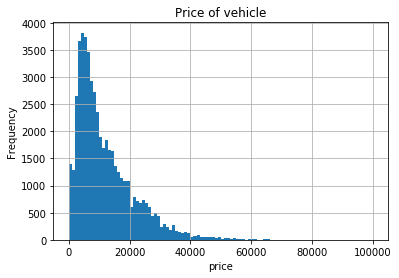

In [25]:
#hitogram for Price
vehicles_us_copy.hist('price',bins=100, range=(0,100000))
plt.title('Price of vehicle')
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

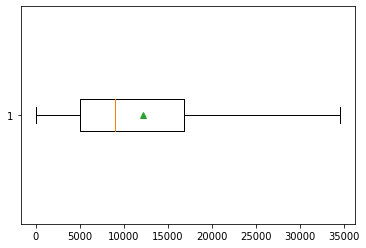

In [26]:
#to check for outliers in price data
plt.boxplot(vehicles_us_copy.price,showmeans=True,vert=False,sym='')
plt.show()

The column on the right side are low as there are fewer price that exceed 40,000 price. From the histogram graph we can say the data contains outliers as the tail elongate on the right side of the histogrm. As price that lies abonormal distance from the other price.Prices that lasts 60000 is less and almost nobody pays more than 70,000. 

From the boxplot we can filter the outliers by using "sym=' '" this will remove all the outliers. 
Lets set the maximum to 35000.
Higher price are rare so we won't loose much data by slicing out data to: vehicles_us_copy.query('price < 35,000). From the box plot we can see the green color traingle shows the average price that is around 12,500 and the median is around 8,000.
From the histogram we can say that there is a peek between 2500 to 7500 price which is reasonable. Value on either side of the peek gets smaller.

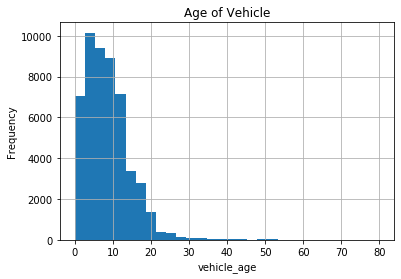

In [27]:
#hitogram for Vehicle_Age
vehicles_us_copy.hist('vehicle_age', bins = 30, range=(0,80))
plt.title('Age of Vehicle')
plt.xlabel("vehicle_age")
plt.ylabel("Frequency")
plt.show()
plt.show()

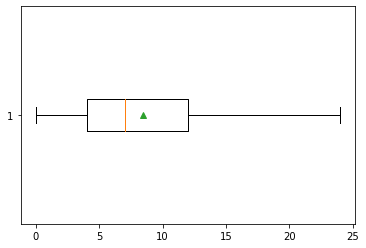

In [28]:
#to check for outliers in age data
plt.boxplot(vehicles_us_copy.vehicle_age,showmeans=True,vert=False,sym='')
plt.show()

The column on the right side are low as there are lesser vehicle age that exceed 30 years. From the histogram graph we can say the data contains outliers as it is right skeweed and tails enlongate towards the right side. As age that lies abonormal distance from the other age.Age that lasts 40 is less and almost nobody takes vehicle aged more than 55 years.

From the boxplot we can filter the outliers by using "sym=' '" this will remove all the outliers. Lets set the maximum to 25. Higher age are rare so we won't loose much data by slicing out data to: vehicles_us_copy.query('vehicle_age < 25). From the box plot we can see the green color traingle shows the average age that is around 9 years and the median is around 6. From the histogram we can say that there is a peek between 6 to 8 years. Value on either side of the peek gets smaller.

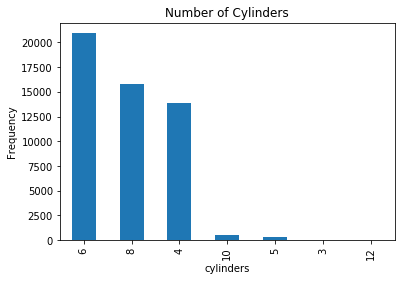

In [29]:
#histogram for Number of Cylinders
vehicles_us_copy['cylinders'].value_counts().plot(kind = 'bar')
plt.title('Number of Cylinders')
plt.xlabel("cylinders")
plt.ylabel("Frequency")
plt.show()

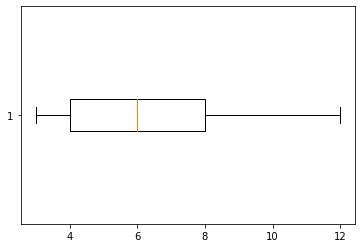

In [30]:
#to check for outliers in cylinders data
plt.boxplot(vehicles_us_copy.cylinders,vert=False)
plt.show()

We can see that Cylinder: 6,8 & 4 are clearly the leaders. As cylinder consist of 7 different categories so created a bar graph in order to better understand this column instead of histogram. In this case the bars won't touch as cylinder is in different category. 

From the boxplot we can see there is no outliers in the cylinder column.

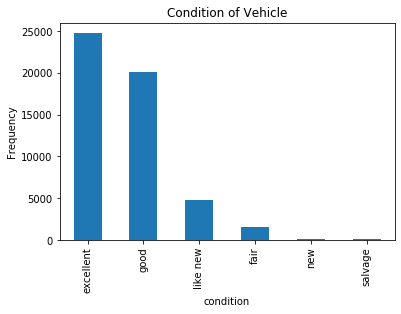

In [31]:
#histogram for condition
vehicles_us_copy['condition'].value_counts().plot(kind = 'bar')
plt.title('Condition of Vehicle')
plt.xlabel("condition")
plt.ylabel("Frequency")
plt.show()

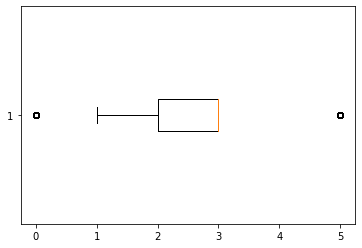

In [32]:
#to check for outliers in condition data
plt.boxplot(vehicles_us_copy.num_condition,vert=False)
plt.show()

As we can see from the graph above car is categorised into 6 different categories & maximum count is for 'Excellent' 'good' & 'like_new'. Whereas 'excellant' bar is as high as thrice of 'like_new' category. 
From this we can say that maximum cars are under excellent & good & like_new condition and very few under fair condition. 
From the histogram we can see that there is abnormally very few vehicles who's condition is new & salvage. After plotting the boxplot we can clearly see that vehicle condition 'new' was replaced from string to numeric as '5' & 'salvage' was replaced as '0'.

And the boxplot above shows 0 & 5 were outliers. 
But it's always not necessary to remove the outliers as sometimes removing the outliers can lead to decrease in relationship between the two variables, so as of now we will keep this.

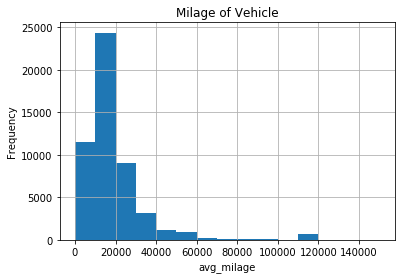

In [33]:
#hitogram for avg_milage_per_year
vehicles_us_copy.hist('avg_milage',bins= 15,range= (0,150000))
plt.title('Milage of Vehicle')
plt.xlabel("avg_milage")
plt.ylabel("Frequency")
plt.show()

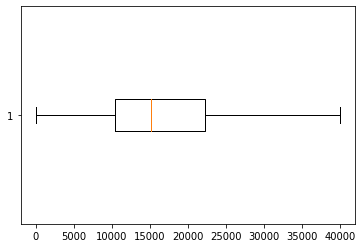

In [34]:
#to check for outliers in condition data
plt.boxplot(vehicles_us_copy.avg_milage,vert=False,sym='')
plt.show()

The column on the right side are low as there are lesser vehicle avg_milage_per_year that exceed 60000. From the graph we can say if the data contains outliers.Milage that lasts 60000 is less and almost nobody takes milage more than 120000. Lets set the maximum to 60000.
From the boxplot we can filter the outliers by using "sym=' '" this will remove all the outliers. Lets set the maximum to 40000.Higher milage are rare so we won't loose much data by slicing out data to:
vehicles_us_copy.query('avg_milage < 40000).
There is a peek between 10000 to 20000 milage. Value on right side of the peek gets smaller.

#### Conclusion

After studing the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Obervation that lies an abnormal distance from other values are considered as ouliers. As higher values are rare so we won't loose much by slicing out the data.

Seeing the histogram got an idea that the histogram is right skeweed that means the tail of the histogram was on the right side so from this we can say that the outliers were on the upper limit. 

By boxplot determine the upper limits the outliers and removed them by slicing:

vehicles_us_copy.query('price < 35,000')

vehicles_us_copy.query('vehicle_age < 25')

vehicles_us_copy.query('avg_milage_per_year < 40000')

It is not always necessary to remove the outliers, in some cases removing the outliers can lead to decrease in significant impact of one variable on another and if this is the case better not to remove the outliers. In this case num_condition column shows outliers at 0 & 5 but instead of removing it kept it as it was.

And now will store this sliced data into a seperate dataframe & will ahead with the filtered data.

### Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data

In [35]:
#Removing the outliers & storing them into new dataset
filtered_data = vehicles_us_copy.query('price < 35000 and vehicle_age < 25 and avg_milage < 40000 ')

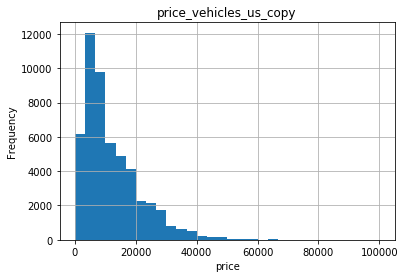

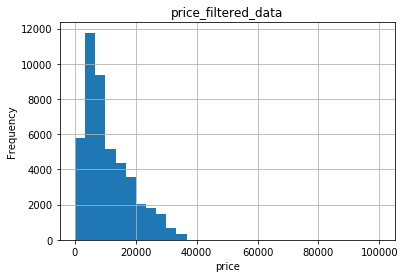

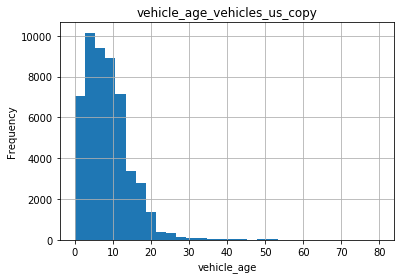

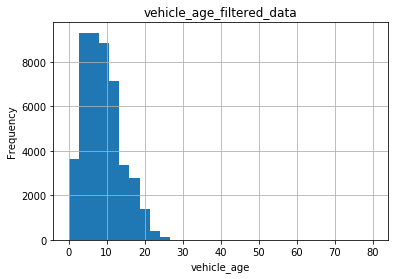

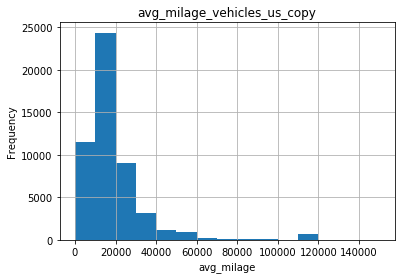

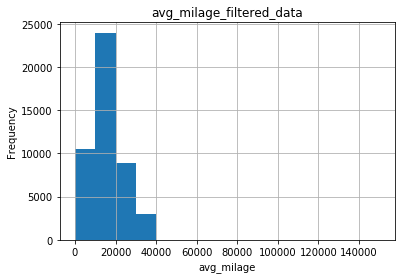

In [36]:
data_new = [{"column":"price","bin":30,"range":100000},{"column":"vehicle_age","bin":30,"range":80},{"column":"avg_milage","range":150000,"bin":15}]

for data in data_new:
    vehicles_us_copy.hist(data["column"],bins=data["bin"], range=(0,data["range"]))
    plt.title(data["column"]+"_"+"vehicles_us_copy")
    plt.xlabel(data["column"])
    plt.ylabel('Frequency')
    filtered_data.hist(data["column"],bins=data["bin"], range=(0,data["range"]))
    plt.title(data["column"]+"_"+"filtered_data")
    plt.xlabel(data["column"])
    plt.ylabel('Frequency')

#### Conclusion

After using the filtered data and the original dataset containing outliers, plotted a histogram for each.
The histogram for the filtered data and original dataset seems to be similar with identical peeks.
Apart from the fact that range of filtered data & original data are different as we determined the upper limits as outliers because the tail elongated on the right hand side of the histogram that's how we determine the outlier in histogram and hence removed the ouliers. So filtered data is dataset without outliers and vehicles_us_copy is dataset with outliers.

New_Changes: Outliers filtering influences mean & median-

Price:  Both Mean & Median will decrese, but means will decrease by more than median 

avg_milage: Both Mean & Median will decrese, but means will decrease by more than median 

vehicle_age: Mean remains the same, whereas median decreases.

### Study how many days advertisements were displayed

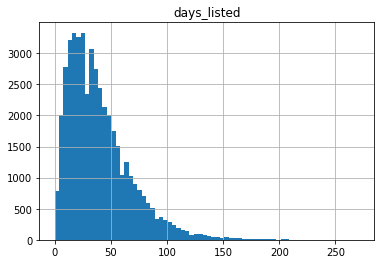

In [37]:
#histogram showing how many days ads were displayed
filtered_data.hist('days_listed',bins=70)
plt.show()

In [38]:
#mean & median to determine Skewness
print('Mean:',filtered_data['days_listed'].mean())
print('Median:',filtered_data['days_listed'].median())

Mean: 39.563692480359144
Median: 33.0


From the graph we can say that number of days ads were displayed range from 0 to 220. This is right skewed histogram. As skewness indicate the concentration of data on that side. Here the data is concentrated on the right side.
If mean > median it indicates that histogram is right skewed. 
Skewness is important as it tells us a lot about where the data is situated.

### Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [39]:
#typical lifetime of an ad
filtered_data['days_listed'].mean()

39.563692480359144

Typical lifetime of an ad is 39 days.

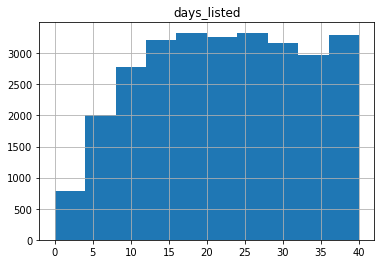

In [40]:
#histogram showing from min number of days to mean: median is when ads were removed quickly
filtered_data.hist('days_listed',bins=10, range=(0,40))
plt.show()

If the ads are displayed for less than 20 days then we can say that they were removed quickly. 20 days were decided as this is the median of the above histogram.

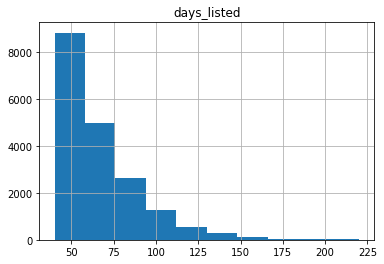

In [41]:
#histogram showing from mean to max number of days: median is ads listed for an abnormally longer time
filtered_data.hist('days_listed',bins=10, range=(40,220))
plt.show()

If the ads are displayed for more than 130 days then we can say that they were removed quickly. 130 days were decided as this is the median of the above histogram.

#### Conclusion

The typical lifetime of an ads was 39 days.If the ads were displayed for less than 20 days it was determined as ads were removed quickly.And if the ads stayed for more than 130 days that detremine the ads was listed for abnormally long time.

39 days: Typical lifetime of an ad were calculated based on average number of days ads displayed
20 days: Ads removed quickly were calculated by calculating median value of range between min of days_listed to mean of days_listed
130 days: Ads listed for abnormally long time were calculated by calculating median value of range between mean of days_listed to max of days_listed

So if the ads were: days < 20, removed quickly.
if the ads were: days > 130, abnormally long.

From the histogram got an idea about how number of days ads displayed was structured.

### Analyze the number of ads and the average price for each type of vehicle

In [42]:
#number of ads and the average price for each type of vehicle
model_stat = filtered_data.pivot_table(index=["type"], values=["price"], aggfunc=["count",'mean'])
model_stat.columns = ['count','avg_price']
print(model_stat)

             count     avg_price
type                            
SUV          11428  10119.618918
bus             23  17445.913043
convertible    343  12681.489796
coupe         1946  12932.757451
hatchback      960   6529.743750
mini-van      1077   7567.294336
offroad        181  13881.033149
other          222   9859.761261
pickup        6124  14400.483181
sedan        11318   6658.151705
truck        10642  14605.882353
van            584  10126.607877
wagon         1484   8704.950809


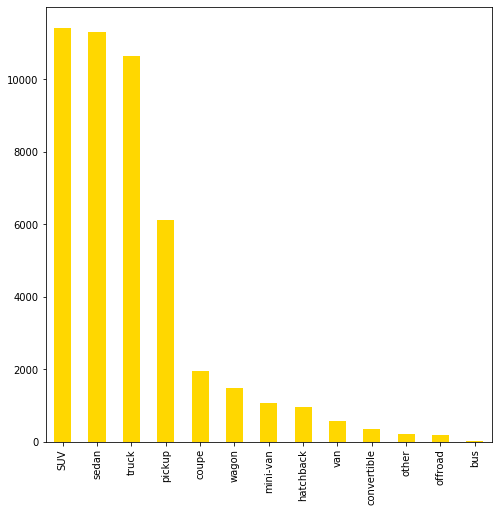

In [43]:
#graph showing the dependence of the number of ads on the vehicle type
filtered_data['type'].value_counts().plot(kind='bar', color = 'gold', width = 0.5, figsize=(8,8))
plt.show()

In [44]:
#two types of vehicle with the greatest number of ads
model_stat.sort_values(by='count',ascending=False)

,count,avg_price
type,,
SUV,11428,10119.618918
sedan,11318,6658.151705
truck,10642,14605.882353
pickup,6124,14400.483181
coupe,1946,12932.757451
wagon,1484,8704.950809
mini-van,1077,7567.294336
hatchback,960,6529.743750
van,584,10126.607877


#### Conclusion

Two types with the greatest number of ads: 'SUV'   &  'Sedan' 
From the graph & pivot table we can see that these two are clearly the leaders.

### What factors impact the price most. Whether the price depends on age, mileage, condition, transmission type, and color

In [45]:
#dataset containg some numeric variable
filtered_data_relation = filtered_data [['avg_milage','num_condition','vehicle_age','price']]

In [46]:
filtered_data_relation.corr()

,avg_milage,num_condition,vehicle_age,price
avg_milage,1.000000,0.039859,-0.54795,0.198046
num_condition,0.039859,1.000000,-0.25750,0.189446
vehicle_age,-0.547950,-0.257500,1.00000,-0.502200
price,0.198046,0.189446,-0.50220,1.000000


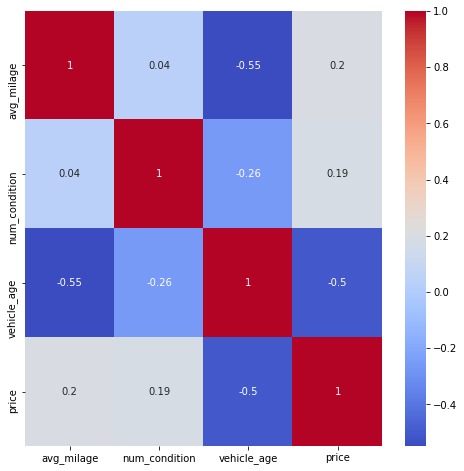

In [47]:
#Seaborn correlation heatmap
plt.figure(figsize=(8,8))
seaborn.heatmap(filtered_data_relation.corr(), annot=True, cmap= 'coolwarm')
plt.show()

The blues are negative correlation the darker the blue the stronger the correlation is.
We have this 0 where there is not much correlation at all.
The reds are positive correlation and darker the color stronger the correlation.

From the above heatmap we can see the comparison of price with respect to avg_milage & condition of the car & vehicle_age. 
Negative correlation between price & vehicle_age: With increase in price there will be decresed vehicle_age
Positive correlation between price & num_condition: With increse in price there will be increse in car conditioned 

Positive correlation between price & avg_milage: Does not make scence as with increase in price there should be decrese in avg_milage.

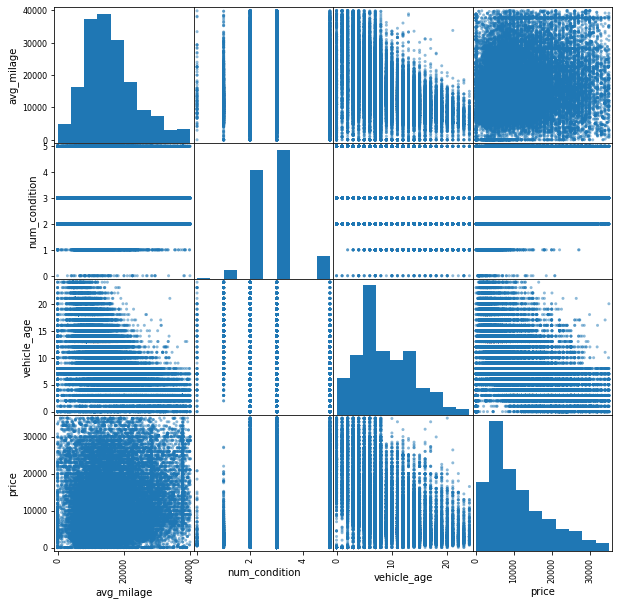

In [48]:
# Scatter Matrix
pd.plotting.scatter_matrix(filtered_data_relation,figsize=(10,10))
plt.show()

In [49]:
#categories have atleast 50 ads
trans = filtered_data.pivot_table(index="transmission", values="model", aggfunc="count")
trans.columns = ['count']
print(trans)

              count
transmission       
automatic     42323
manual         2487
other          1522


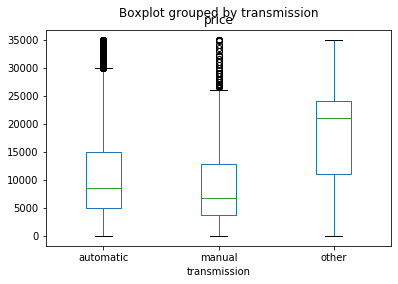

In [50]:
#price impact on transmission plot box-and-whisker charts
filtered_data.boxplot(by='transmission',column=['price'],grid=False)
plt.show()

We have three different types of transmisson: automatic, manual & other.
From the count of ads for each category we can say that all category had ads more than 50.
We want to know the impact price with respect to these types. 
We see that the 'other' category is higher than the rest & its median price is also 21,000 where as for the rest median price is between 5000 to 10000.

In [51]:
#categories have atleast 50 ads
paint_clr = filtered_data.pivot_table(index="paint_color", values="model", aggfunc="count")
paint_clr.columns = ['count']
print(paint_clr)

             count
paint_color       
black         6806
blue          4116
brown         1146
custom        1072
green         1331
grey          4560
orange         208
purple          95
red           4001
silver        5792
unknown       8326
white         8696
yellow         183


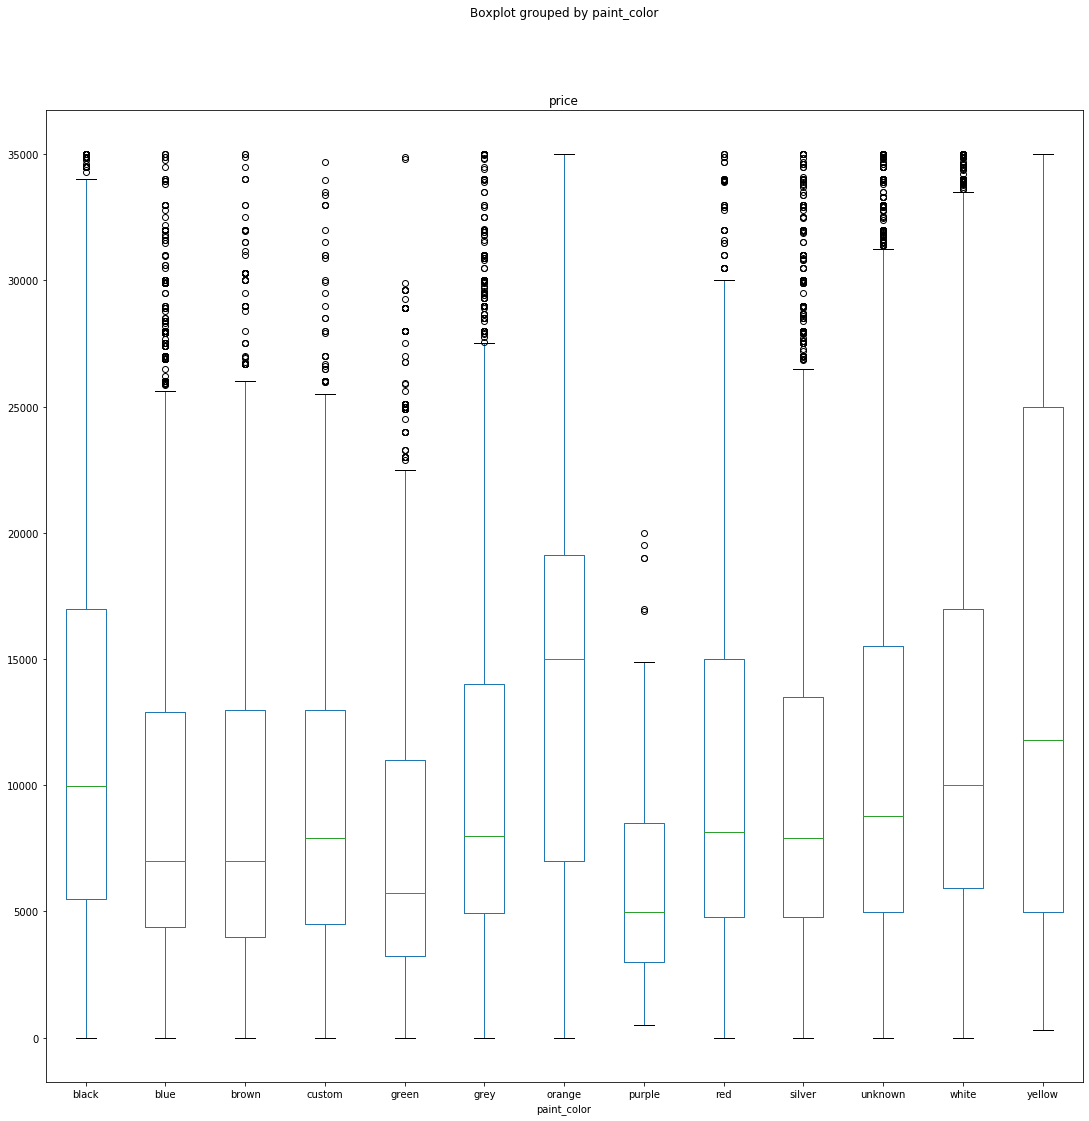

In [52]:
#price impact on transmission plot box-and-whisker charts
filtered_data.boxplot(by='paint_color',column=['price'],grid=False,figsize=(18,18))
plt.show()

From the count of ads for each color we can say that all colors had ads more than 50.
We can say that color has impact on median price. 
For some colors like: orange & yellow average price was between 10,000 to 15,000 
Whereas for rest other colors average price was between 5000 to 10000

## Step 5. Overall conclusion

Correlation tells us how closely two variables move together or in opposite directions or even they are realted atall.

From the above analysis we can conclude that following variables were taken into consideration to determine if they had impact on price: vehicle_age, avg_milage, condition, transmision & color.

Inorder to see how these numerical variable is realted to price, plotted a heatmap to see the visual representation of the relationship.

From the correlation values we concluded that- There was negative & positive correlation:
price & vehicle_age: that means with the increase in age of the vehicle price of the vehicle decreses as it's negatively correlated.
price & condition: that means if the condition is fair price won't be very high incase where condition is excellent high price as it says it is positively correlated.
price & avg_milage: that means with increase in avg_milage of the vehicle there will be increse in price as this says it is positivily correlated.

But the vale of correlation for (price & avg_milage) and (price & condition) is close to 0 indicating that there is no relationship or week relationship between them.
The value of correlation for (price & vehicle_age) is 0.5 indicates that the variables are moderately correlated.

To see how the categorical variable is realted to price, plotted boxplot to see the visual representation.
price & transmission type: They were categorised into- automatic type, mannual type & others. Medium price of automatic & mannual type is between 5000 to 1000 whereas other category has medium price 21000 indicates that transmission type does not have much impact on price.
price & color: There are total 12 different types of color & unknown category(who's colors were not mentioned). Few colors like yellow & orange had heigher medium price as compared to rest other colors indicates that color has an impact on price


To Conclude: "Age of the vehicle" & "paint_color" influence the price of the vehicle. 

For vehicle_age with increse in age price decreses and these two are moderately correlated.
Transmission type does not had much impact on price as medium price of transmission type was really low as compared to
other categories.
Category showed postive correlation with respect to price but the value was close to 0 indicating they had week realtionship or no relationship at all.
Avg_milage also showed positive correlation(to be honest i was expecting it should be negative correlation, as from my understanding with increse in avg_milage the price should be decrese) with respect to price but the value was close to 0 indicating week relationship or no relationship.